In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [12]:
# stats
from scipy import stats
#scaling, normalization
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# kmeans, dbscan, hierarchical (sklearn)
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
# evaluation
from sklearn.metrics import silhouette_score
# distance matrix (dbscan elbow, hierarchical)
from scipy.spatial.distance import pdist, squareform
# hierarchical (scipy)
from scipy.cluster.hierarchy import linkage, dendrogram
# Principal Component Analysis
from sklearn.decomposition import PCA
from sklearn.metrics.cluster import rand_score
from sklearn.metrics.cluster import adjusted_rand_score

In [13]:
df = pd.read_csv("../../our_analyses/dataset_prepared.csv")

In [14]:
from sklearn.preprocessing import LabelEncoder

# df = df[~((df['tempo'] == 0) & (~df['genre'].isin([16])))]

# # # Filtro per rimuovere le righe con acousticness e energy > 0.8 e non appartenenti ai genre_group 1 e 2
# df = df[~((df['acousticness'] > 0.8) & (df['energy'] > 0.8) & (~df['genre'].isin([16])))]
# df = df[~((df['acousticness'] < 0.3) & (df['energy'] < 0.3) & (~df['genre'].isin([16,12,18])))]

# Il DataFrame 'df' ora contiene solo le righe che soddisfano le tue condizioni

# Calcola i quantili per 'popularity'
# Q1 = df['popularity'].quantile(0.2)
# Q2 = df['popularity'].quantile(0.4)
# Q3 = df['popularity'].quantile(0.60)
# Q4 = df['popularity'].quantile(0.80)

# # Definisci gli intervalli di bin
# bin_edges = [-1, Q1, Q2, Q3, Q4, df['popularity'].max()]
# bin_labels = ['Very Low Popularity', 'Low Popularity', 'Medium Popularity', 'High Popularity', 'Very High Popularity']


# # Crea la colonna 'popularity_category' con i valori discretizzati
# df['popularity_category'] = pd.cut(df['popularity'], bins=bin_edges, labels=bin_labels)
# df=df.drop(["popularity"], axis=1)

# le = LabelEncoder()
# df['popularity_category'] = le.fit_transform(df['popularity_category'])

In [15]:
df['explicit'] = df['explicit'].apply(lambda x: 1 if x else 0)
df['genre'] = pd.factorize(df['genre'])[0]
y = np.array(df["genre"])
df = df.drop(['name', 'artists', 'album_name', 'genre'], axis=1)
X = df.values

In [16]:
df.head()

,duration_ms,explicit,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,n_beats
0,293106,0,50,0.401,0.683,8,-5.722,1,0.0401,0.181,0.000000,0.0837,0.226,135.951,4.0,654.0
1,194972,0,52,0.672,0.858,3,-5.233,1,0.1450,0.456,0.811000,0.1040,0.963,166.689,4.0,537.0
2,178428,0,22,0.636,0.826,3,-7.486,1,0.0585,0.461,0.271000,0.1410,0.731,102.809,4.0,304.0
3,238373,0,20,0.733,0.862,7,-5.813,1,0.0604,0.287,0.000532,0.4660,0.745,107.981,4.0,427.0
4,221893,0,22,0.712,0.225,5,-10.017,1,0.0533,0.930,0.001000,0.1230,0.429,87.520,4.0,317.0


In [17]:
scaler = MinMaxScaler()
X_minmax = scaler.fit_transform(X)
X_minmax

array([[0.06919813, 0.        , 0.53191489, ..., 0.61648793, 0.8       ,
        0.08900381],
       [0.04533095, 0.        , 0.55319149, ..., 0.75587348, 0.8       ,
        0.07308111],
       [0.04130728, 0.        , 0.23404255, ..., 0.46620111, 0.8       ,
        0.0413718 ],
       ...,
       [0.05482417, 0.        , 0.57446809, ..., 0.54411518, 0.8       ,
        0.06273816],
       [0.06141224, 0.        , 0.59574468, ..., 0.58954314, 0.8       ,
        0.07702776],
       [0.07293383, 0.        , 0.45744681, ..., 0.5578007 , 0.8       ,
        0.09471965]])

In [18]:
# from sklearn.decomposition import PCA

# pca = PCA()
# X_pca = pca.fit_transform(X_minmax)

# # Calcolo della varianza cumulativa spiegata
# varianza_cumulativa = pca.explained_variance_ratio_.cumsum()

# # Grafico della varianza cumulativa spiegata
# plt.figure(figsize=(8, 5))
# plt.plot(range(1, len(varianza_cumulativa)+1), varianza_cumulativa, marker='o', linestyle='--')
# plt.title('Varianza Cumulativa Spiegata dalle Componenti Principali')
# plt.xlabel('Numero di Componenti Principali')
# plt.ylabel('Varianza Cumulativa Spiegata')
# plt.show()

In [19]:
# pca = PCA(n_components=3)
# X_pca = pca.fit_transform(X_minmax)

# K-means

In [20]:
# Lista per memorizzare SSE e punteggi silhouette
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

sse_list = []
silhouette_scores = []

# Ciclo da k=2 a k=10 per calcolare SSE e punteggio silhouette
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300)
    kmeans.fit(X_minmax)
    sse_list.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_minmax, kmeans.labels_))

# Grafico per SSE
plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), sse_list, marker='o')
plt.title('SSE per Diversi Valori di k')
plt.xlabel('Numero di Cluster (k)')
plt.ylabel('SSE')
plt.show()

# Grafico per il punteggio silhouette
plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Punteggio della Silhouette per Diversi Valori di k')
plt.xlabel('Numero di Cluster (k)')
plt.ylabel('Punteggio della Silhouette')
plt.show()

AttributeError: 'NoneType' object has no attribute 'split'

In [ ]:
# Lista per salvare i risultati di silhouette e SSE
silhouette_scores = []
sse_values = []

# Prova con un numero di cluster da 2 a 10
for num_clusters in range(2, 11):
    # Modello K-Means
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X_minmax)
    
    # Calcolo silhouette score
    silhouette_avg = silhouette_score(X_minmax, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)
    
    # Calcolo SSE
    sse = kmeans.inertia_
    sse_values.append(sse)

# Stampa i risultati
print("Numero di Cluster | Silhouette Score | SSE")
print("-----------------------------------------")
for num_clusters, silhouette, sse in zip(range(2, 11), silhouette_scores, sse_values):
    print(f"{num_clusters:^18} | {silhouette:^16.4f} | {sse:^8.2f}")

/Users/francescocapria/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/francescocapria/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/francescocapria/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/francescocapria/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarni

Numero di Cluster | Silhouette Score | SSE
-----------------------------------------
        2          |      0.2597      | 11032.08
        3          |      0.2394      | 9453.00 
        4          |      0.2134      | 8527.78 
        5          |      0.2173      | 7832.75 
        6          |      0.2300      | 7218.10 
        7          |      0.2153      | 6663.89 
        8          |      0.2017      | 6291.87 
        9          |      0.2063      | 5941.83 
        10         |      0.1926      | 5726.82 


In [ ]:
kmeans = KMeans(n_clusters=5, n_init=10, max_iter=100, random_state=4)
kmeans.fit(X_minmax)

KMeans(max_iter=100, n_clusters=5, n_init=10, random_state=4)

In [ ]:
print('SSE', kmeans.inertia_) 
print('Silhouette', silhouette_score(X_minmax, kmeans.labels_))

SSE 7832.747585369503


Silhouette 0.21734063740594547


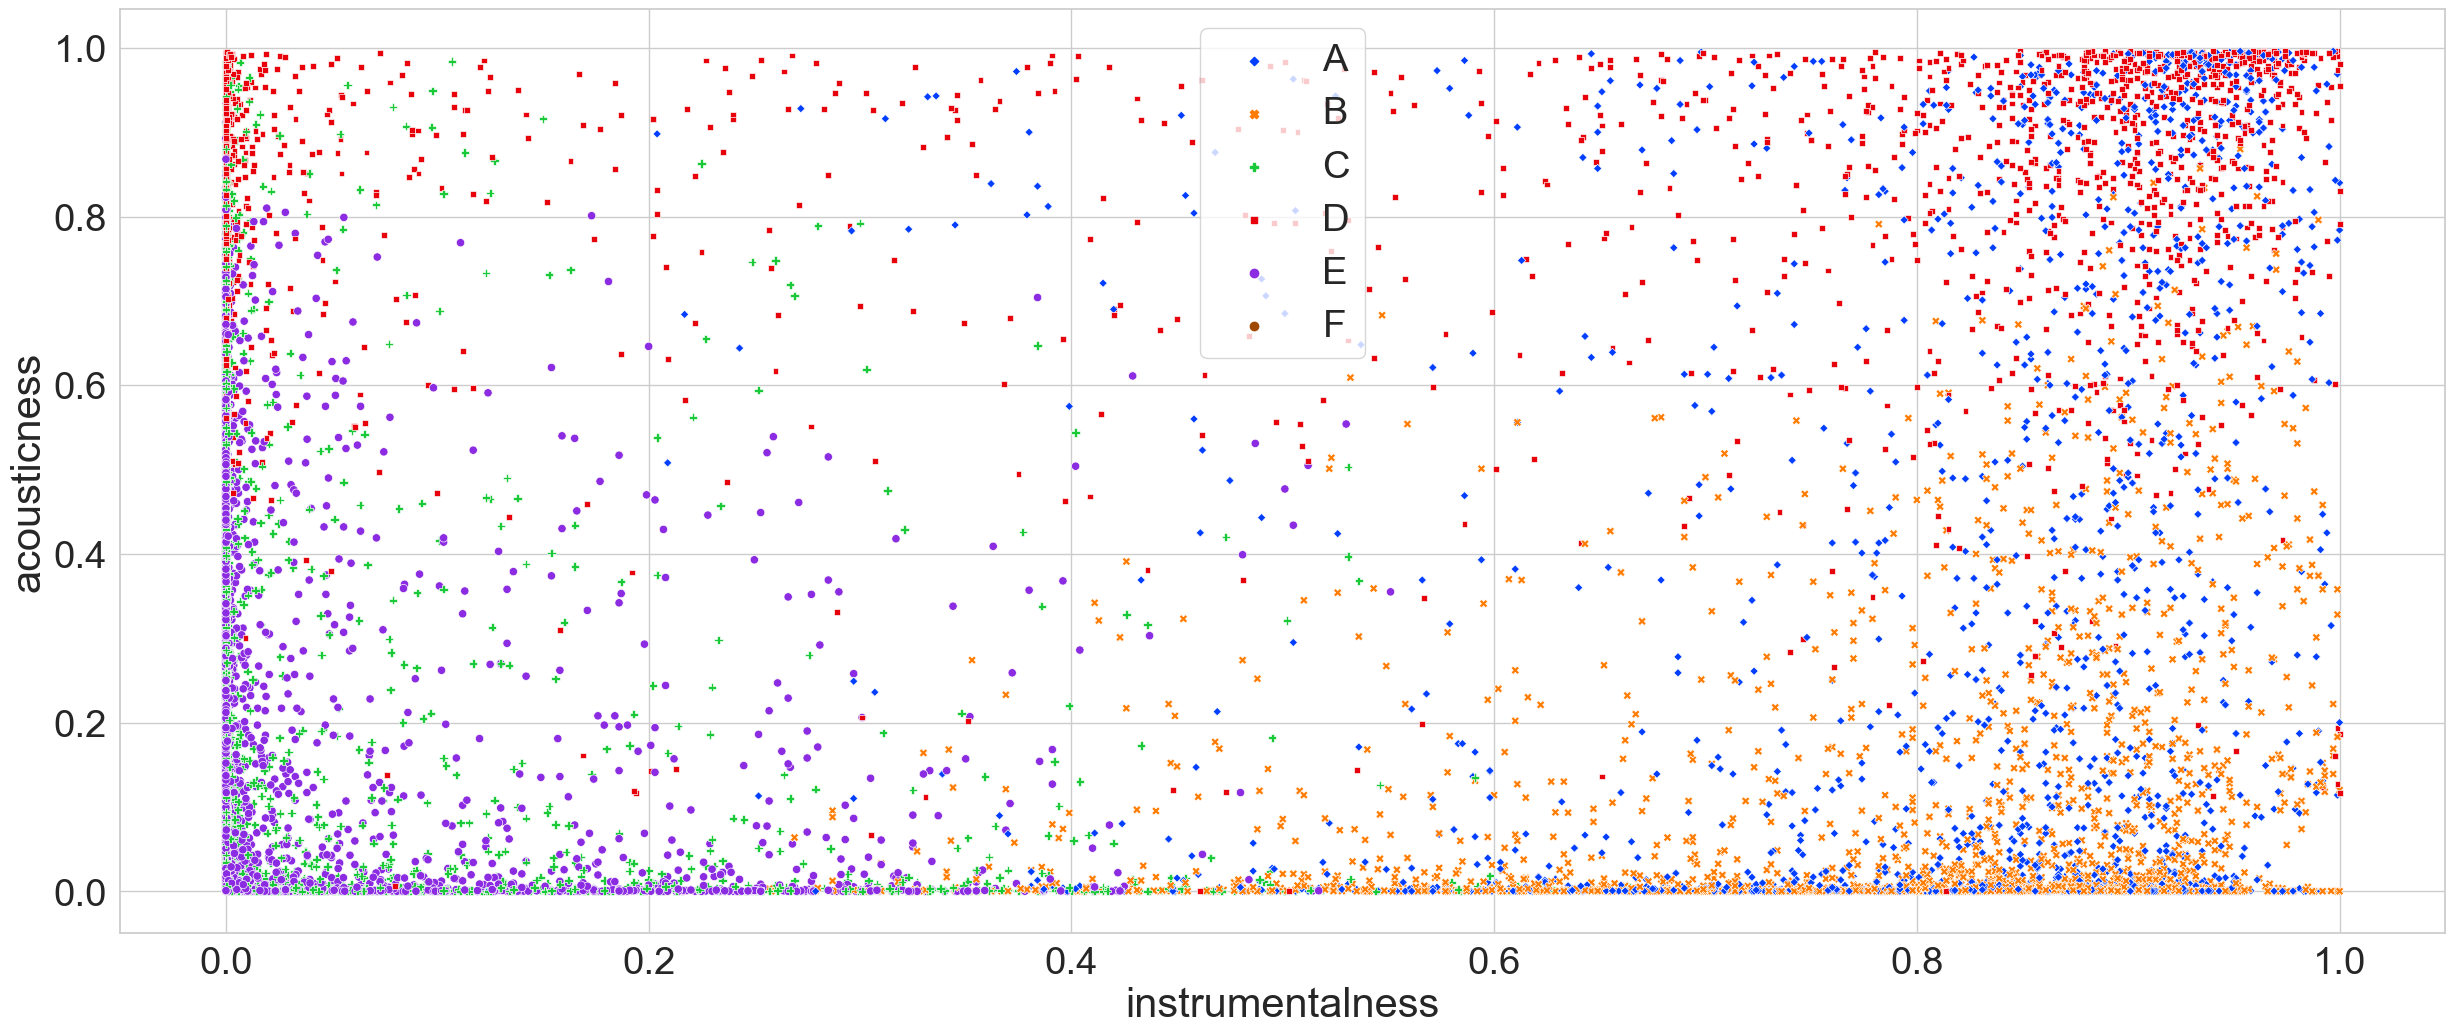

In [ ]:
plt.figure(figsize=(30, 12))

centers = scaler.inverse_transform(kmeans.cluster_centers_)
df['kmeans_labels'] = kmeans.labels_
df['kmeans_labels'] = df['kmeans_labels'].map({0:"A", 1: "B", 2: "C", 3:"D", 4: "E", 5: "F"})

sns.scatterplot(data=df, 
                x="instrumentalness", 
                y="acousticness", 
                hue='kmeans_labels', 
                style='kmeans_labels',
                palette="bright", 
                hue_order=["A", "B", "C", "D", "E", "F"]
               )
plt.legend()
plt.show()

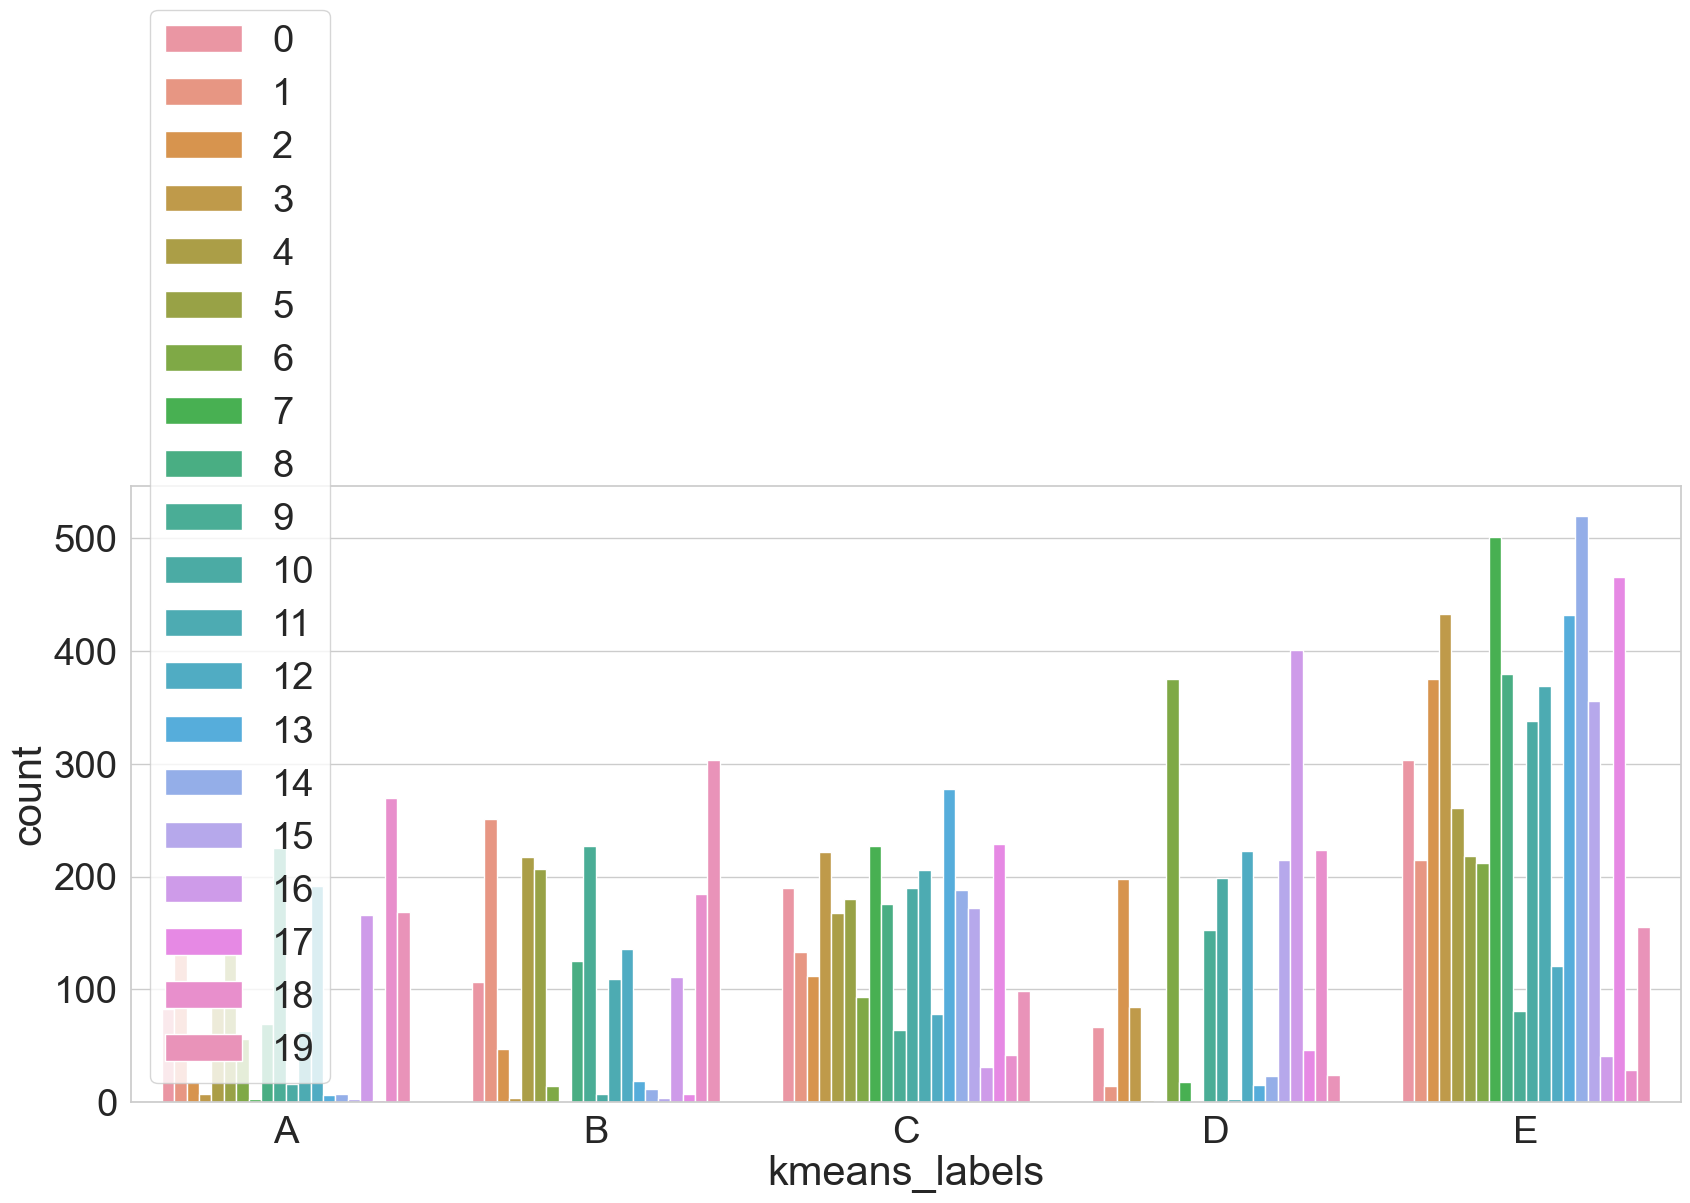

In [ ]:
plt.figure(figsize=(20, 8))

sns.countplot(data=df, x='kmeans_labels', hue=y, order=["A", "B", "C", "D", "E"])
plt.show()

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans

# Assumiamo che X_minmax e y siano già definiti e che y contenga i generi musicali

# Eseguire KMeans
kmeans = KMeans(n_clusters=5, n_init=10, max_iter=100, random_state=4)
kmeans.fit(X_minmax)

# Assegnare ogni punto ai suoi rispettivi cluster
cluster_labels = kmeans.labels_

# Creare una nuova colonna nel DataFrame originale per i cluster
df['cluster'] = cluster_labels

# Recuperare la colonna 'genre' che era stata trasformata in y
df['genre'] = y

# Calcolare la frequenza di ogni genere in ciascun cluster
cluster_genre_counts = df.groupby(['cluster', 'genre']).size().unstack(fill_value=0)

# Calcolare la dimensione di ogni cluster
cluster_sizes = df['cluster'].value_counts()

# Calcolare le proporzioni relative di ogni genere all'interno dei cluster
cluster_genre_proportions = cluster_genre_counts.div(cluster_sizes, axis=0)

# Determinare il cluster dominante per ogni genere basandosi sulle proporzioni
dominant_cluster_per_genre = cluster_genre_proportions.idxmax(axis=0)

print(dominant_cluster_per_genre)


genre
0     2
1     1
2     3
3     4
4     1
5     1
6     3
7     4
8     4
9     0
10    3
11    2
12    0
13    2
14    4
15    3
16    3
17    4
18    0
19    1
dtype: int64


# Bisecting k-means

In [ ]:
from sklearn.cluster import BisectingKMeans

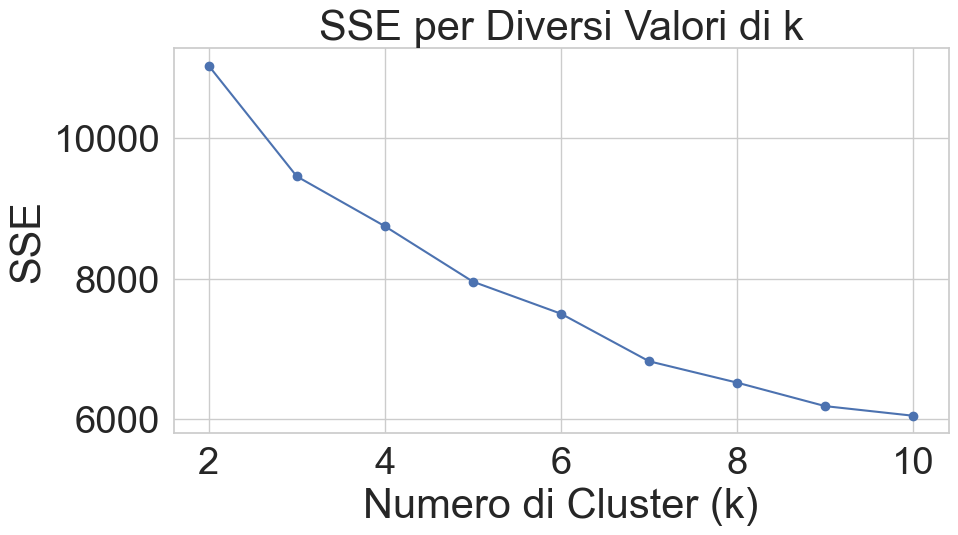

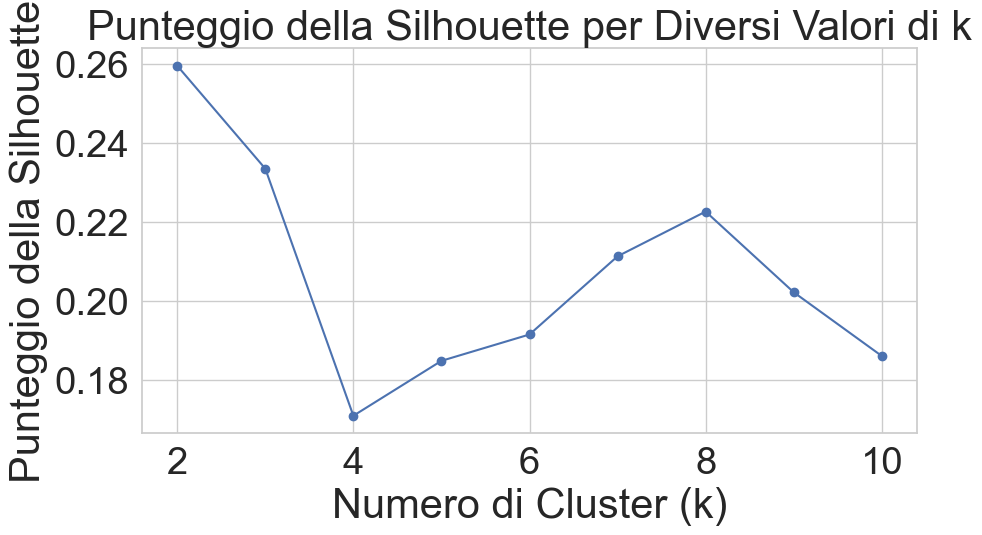

In [ ]:
# Lista per memorizzare SSE e punteggi silhouette
sse_list = []
silhouette_scores = []

# Ciclo da k=2 a k=10 per calcolare SSE e punteggio silhouette
for k in range(2, 11):
    kmeans = BisectingKMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300)
    kmeans.fit(X_minmax)
    sse_list.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_minmax, kmeans.labels_))

# Grafico per SSE
plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), sse_list, marker='o')
plt.title('SSE per Diversi Valori di k')
plt.xlabel('Numero di Cluster (k)')
plt.ylabel('SSE')
plt.show()

# Grafico per il punteggio silhouette
plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Punteggio della Silhouette per Diversi Valori di k')
plt.xlabel('Numero di Cluster (k)')
plt.ylabel('Punteggio della Silhouette')
plt.show()

In [ ]:
# Lista per salvare i risultati di silhouette e SSE
silhouette_scores = []
sse_values = []

# Prova con un numero di cluster da 2 a 10
for num_clusters in range(2, 11):
    # Modello K-Means
    kmeans = BisectingKMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X_minmax)
    
    # Calcolo silhouette score
    silhouette_avg = silhouette_score(X_minmax, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)
    
    # Calcolo SSE
    sse = kmeans.inertia_
    sse_values.append(sse)

# Stampa i risultati
print("Numero di Cluster | Silhouette Score | SSE")
print("-----------------------------------------")
for num_clusters, silhouette, sse in zip(range(2, 11), silhouette_scores, sse_values):
    print(f"{num_clusters:^18} | {silhouette:^16.4f} | {sse:^8.2f}")

Numero di Cluster | Silhouette Score | SSE
-----------------------------------------
        2          |      0.2597      | 11032.08
        3          |      0.2336      | 9456.01 
        4          |      0.1710      | 8746.69 
        5          |      0.1847      | 7956.84 
        6          |      0.1915      | 7499.63 
        7          |      0.2111      | 6823.04 
        8          |      0.1927      | 6592.98 
        9          |      0.1630      | 6360.64 
        10         |      0.1717      | 6035.88 


In [ ]:
bkmeans = BisectingKMeans(n_clusters=5, n_init=10, max_iter=100)
bkmeans.fit(X_minmax)

BisectingKMeans(max_iter=100, n_clusters=5, n_init=10)

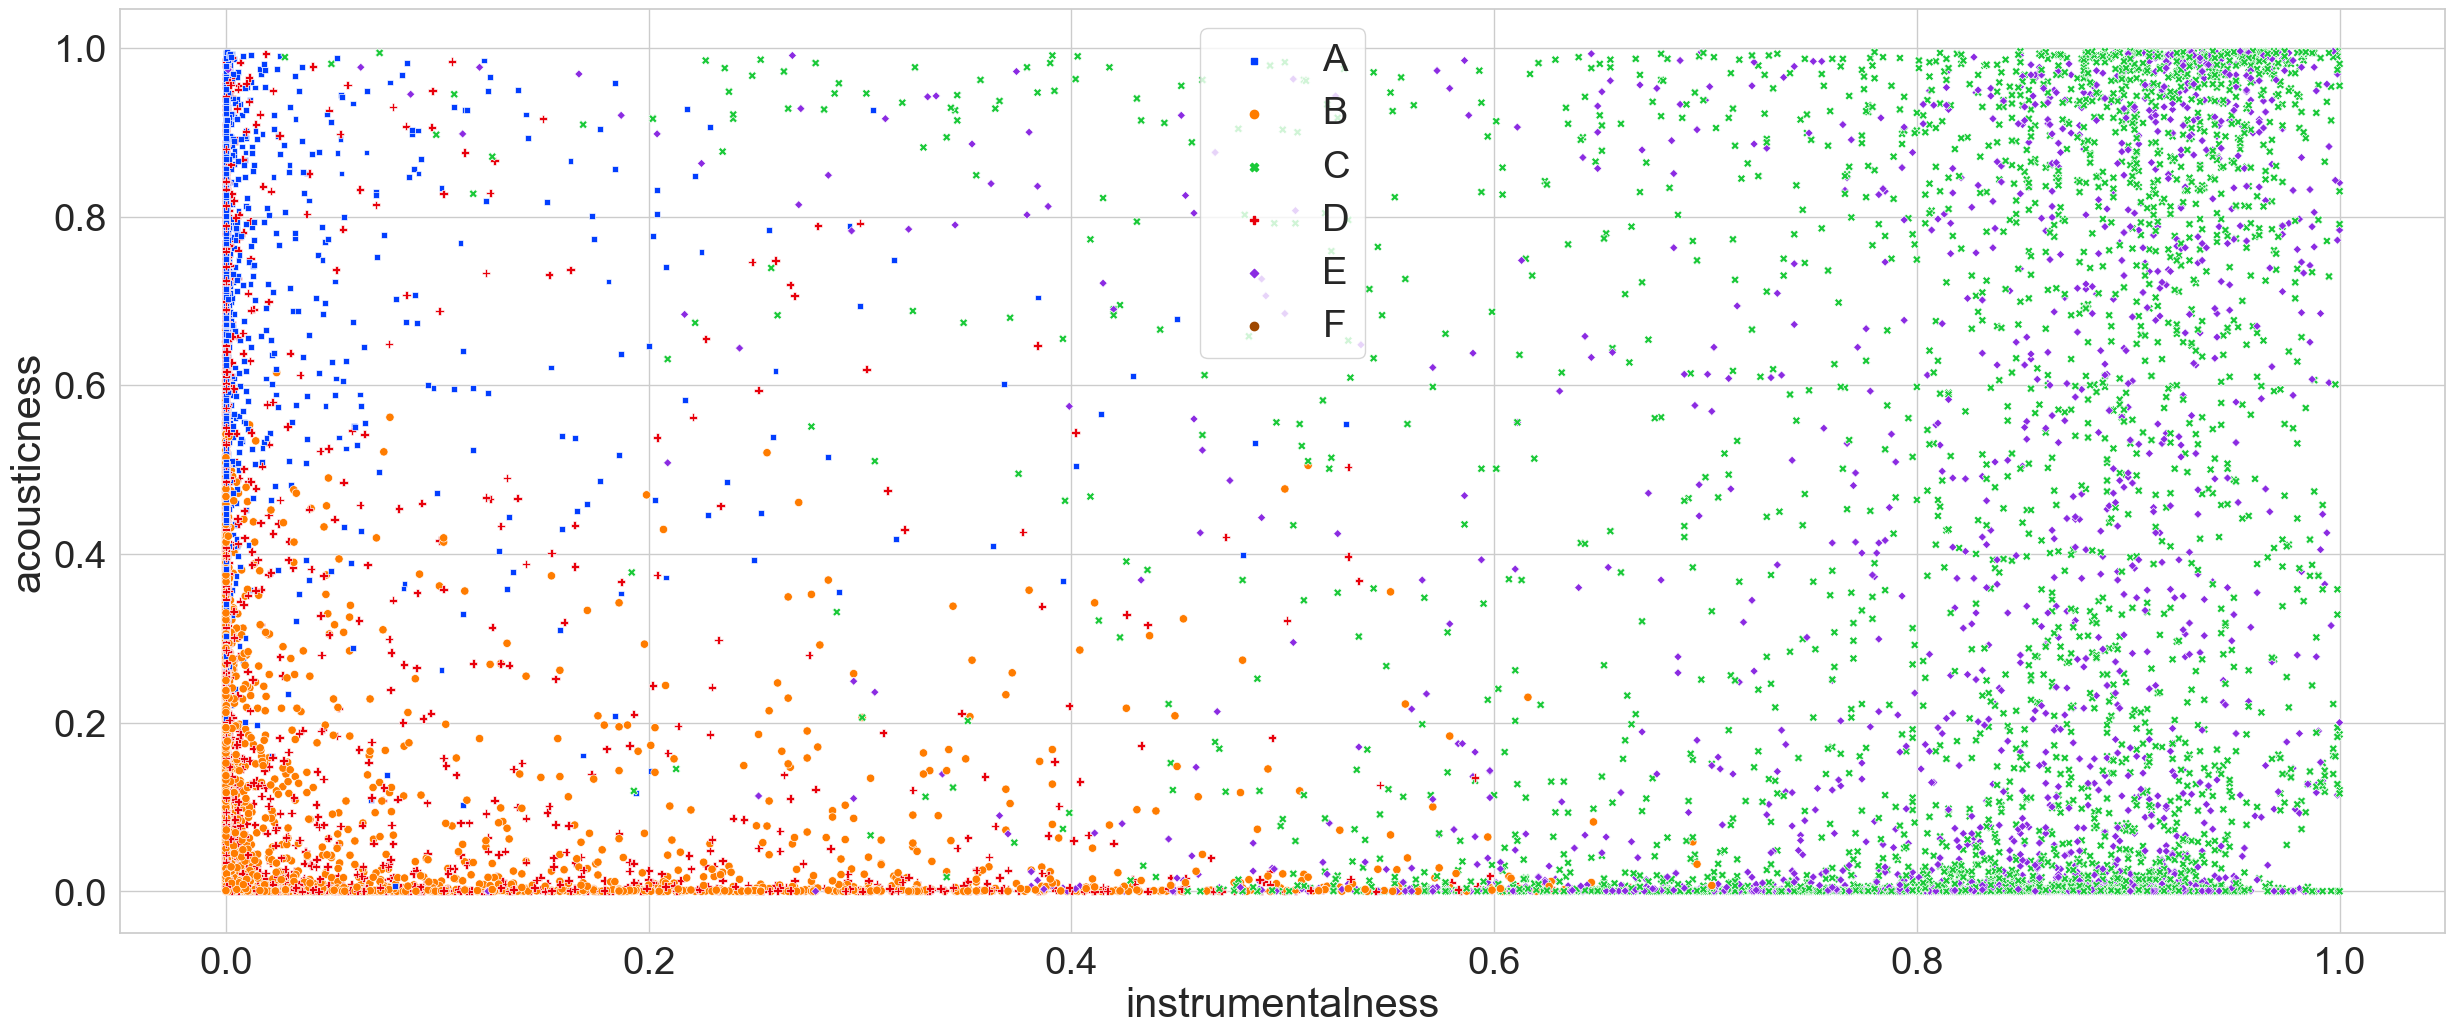

In [ ]:
plt.figure(figsize=(30, 12))

centers = scaler.inverse_transform(bkmeans.cluster_centers_)
df['kmeans_labels'] = bkmeans.labels_
df['kmeans_labels'] = df['kmeans_labels'].map({0:"A", 1: "B", 2: "C", 3:"D", 4: "E", 5: "F"})

sns.scatterplot(data=df, 
                x="instrumentalness", 
                y="acousticness", 
                hue='kmeans_labels', 
                style='kmeans_labels',
                palette="bright", 
                hue_order=["A", "B", "C", "D", "E", "F"]
               )
plt.legend()
plt.show()

In [ ]:
print('SSE', bkmeans.inertia_)
print('Silhouette', silhouette_score(X_minmax, bkmeans.labels_))

SSE 7956.657119047027
Silhouette 0.18482406958749018


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans

# Assumiamo che X_minmax e y siano già definiti e che y contenga i generi musicali

# Eseguire KMeans
kmeans = BisectingKMeans(n_clusters=5, n_init=10, max_iter=100, random_state=4)
kmeans.fit(X_minmax)

# Assegnare ogni punto ai suoi rispettivi cluster
cluster_labels = kmeans.labels_

# Creare una nuova colonna nel DataFrame originale per i cluster
df['cluster'] = cluster_labels

# Recuperare la colonna 'genre' che era stata trasformata in y
df['genre'] = y

# Calcolare la frequenza di ogni genere in ciascun cluster
cluster_genre_counts = df.groupby(['cluster', 'genre']).size().unstack(fill_value=0)

# Calcolare la dimensione di ogni cluster
cluster_sizes = df['cluster'].value_counts()

# Calcolare le proporzioni relative di ogni genere all'interno dei cluster
cluster_genre_proportions = cluster_genre_counts.div(cluster_sizes, axis=0)

# Determinare il cluster dominante per ogni genere basandosi sulle proporzioni
dominant_cluster_per_genre = cluster_genre_proportions.idxmax(axis=0)

print(dominant_cluster_per_genre)


genre
0     1
1     0
2     2
3     2
4     3
5     0
6     2
7     3
8     3
9     0
10    2
11    3
12    0
13    1
14    3
15    2
16    4
17    3
18    0
19    0
dtype: int64


# X-Means

In [ ]:
from pyclustering.cluster import cluster_visualizer
from pyclustering.cluster.xmeans import xmeans
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer
from pyclustering.utils import read_sample
from pyclustering.samples.definitions import SIMPLE_SAMPLES
# Read sample 'simple3' from file.
# Prepare initial centers - amount of initial centers defines amount of clusters from which X-Means will
# start analysis.
amount_initial_centers = 2
initial_centers = kmeans_plusplus_initializer(X_minmax, amount_initial_centers).initialize()
# Create instance of X-Means algorithm. The algorithm will start analysis from 2 clusters, the maximum
# number of clusters that can be allocated is 20.
xmeans_instance = xmeans(X_minmax, initial_centers, 20)
xmeans_instance.process()
# Extract clustering results: clusters and their centers
clusters = xmeans_instance.get_clusters()
centers = xmeans_instance.get_centers()
# Visualize clustering results
visualizer = cluster_visualizer()
visualizer.append_clusters(clusters, X_minmax)
visualizer.append_cluster(centers, None, marker='*', markersize=10)
visualizer.show()

AttributeError: module 'numpy' has no attribute 'warnings'